In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, RandomFlip, RandomContrast, RandomRotation, RandomCrop
from keras.callbacks import EarlyStopping
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
train_dir = r"C:\Users\91909\Desktop\LOOP Mentorship\Railway_Fault_Track_Detection_Data\Railway Track fault Detection Updated\Train"
test_dir = r"C:\Users\91909\Desktop\LOOP Mentorship\Railway_Fault_Track_Detection_Data\Railway Track fault Detection Updated\Test"
validation_dir = r"C:\Users\91909\Desktop\LOOP Mentorship\Railway_Fault_Track_Detection_Data\Railway Track fault Detection Updated\Validation"

In [3]:
# categories = ["Defective", "Non defective"]

In [4]:
# train_ds = []
# test_ds = []
# validation_ds = []

# for i in categories:
#         train_path = os.path.join(train_dir, i)
#         test_path = os.path.join(test_dir, i)
#         validation_path = os.path.join(validation_dir, i)
#         if i == "Defective":
#                 label = 1
#         else:
#                 label = 0
        
#         for j in os.listdir(train_path):
#                 img_path1 = os.path.join(train_path, j)
#                 img1 = cv2.imread(img_path1)
#                 img1 = cv2.resize(img1, (300, 300))
#                 train_ds.append([img1, label])
        
#         for k in os.listdir(test_path):
#                 img_path2 = os.path.join(test_path, k)
#                 img2 = cv2.imread(img_path2)
#                 img2 = cv2.resize(img2, (300, 300))
#                 train_ds.append([img2, label])
        
#         for l in os.listdir(validation_path):
#                 img_path3 = os.path.join(validation_path, l)
#                 img3 = cv2.imread(img_path3)
#                 img3 = cv2.resize(img3, (300, 300))
#                 train_ds.append([img3, label])

In [5]:
# random.shuffle(train_ds)
# random.shuffle(test_ds)
# random.shuffle(validation_ds)

In [6]:
# train_ds = np.array(train_ds)
# test_ds = np.array(test_ds)
# validation_ds = np.array(validation_ds)

In [7]:
# image_size = (300, 300)
# batch_size = 32

In [8]:
# train_ds = keras.preprocessing.image_dataset_from_directory(train_dir, image_size=image_size, batch_size=batch_size, labels="inferred")
# test_ds = keras.preprocessing.image_dataset_from_directory(test_dir, image_size=image_size, batch_size=batch_size, labels="inferred")
# validation_ds = keras.preprocessing.image_dataset_from_directory(validation_dir, image_size=image_size, batch_size=batch_size, labels="inferred")

In [9]:
# def normalize(image, label):
#         image = tf.cast(image/255.0, tf.float32)
#         return image, label

# train_ds = train_ds.map(normalize)
# test_ds = test_ds.map(normalize)
# validation_ds = validation_ds.map(normalize)

In [10]:
# for images, labels in train_ds.take(1):        
#         train_image = images[0]
#         train_label = labels[0]

#         train_image = train_image.numpy()
#         plt.title(train_label.numpy())
#         plt.imshow(train_image)

In [11]:
augmentor_train = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=90,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        width_shift_range=0.2,
        height_shift_range=0.2,
        fill_mode="nearest")

augmentor_test = ImageDataGenerator(
        rescale=1.0/255)

In [12]:
train_aug = augmentor_train.flow_from_directory(
        train_dir,
        target_size=(256, 256),
        batch_size=32,
        class_mode="binary")

test_aug = augmentor_test.flow_from_directory(
        test_dir,
        target_size=(256, 256),
        batch_size=32,
        class_mode="binary")

validation_aug = augmentor_test.flow_from_directory(
        validation_dir,
        target_size=(256, 256),
        batch_size=32,
        class_mode="binary")

Found 299 images belonging to 2 classes.
Found 22 images belonging to 2 classes.
Found 62 images belonging to 2 classes.


In [52]:
model = Sequential()

# model.add(RandomFlip(mode="horizontal"))
# model.add(RandomFlip(mode="vertical"))
# model.add(RandomContrast(factor=0.2))
# model.add(RandomRotation(factor=0.25))
# model.add(RandomCrop(height=500, width=500))

model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3),
                 padding="valid",
                 activation="relu",
                 input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=2,
                       padding="valid"))

model.add(Conv2D(64, kernel_size=(3, 3),
                 padding="valid",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=2,
                       padding="valid"))

model.add(Conv2D(128, kernel_size=(3, 3),
                 padding="valid",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=2,
                       padding="valid"))

model.add(Conv2D(512, kernel_size=(3, 3),
                 padding="valid",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=2,
                       padding="valid"))

model.add(Conv2D(1024, kernel_size=(3, 3),
                 padding="valid",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=2,
                       padding="valid"))

model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(50, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

In [53]:
train_aug.image_shape

(256, 256, 3)

In [54]:
input_shape = (None, 256, 256, 3)

In [55]:
model.build(input_shape=input_shape)

In [56]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_10 (Bat  (None, 256, 256, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d_18 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                      

In [57]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [58]:
early_stopping = EarlyStopping(
        monitor='loss',
        min_delta=0.005,
        patience=5,
        restore_best_weights=True
)

In [59]:
history = model.fit(train_aug,
                    epochs=20,
                    validation_data=validation_aug,
                    callbacks=[early_stopping])

Epoch 1/20
10/10 [==============================] - 53s 5s/step - loss: 1.8189 - accuracy: 0.5318 - val_loss: 0.6856 - val_accuracy: 0.5645
Epoch 2/20
10/10 [==============================] - 43s 4s/step - loss: 1.3565 - accuracy: 0.5184 - val_loss: 0.6480 - val_accuracy: 0.5484
Epoch 3/20
10/10 [==============================] - 43s 4s/step - loss: 0.9619 - accuracy: 0.5819 - val_loss: 0.6201 - val_accuracy: 0.6290
Epoch 4/20
10/10 [==============================] - 44s 4s/step - loss: 1.0090 - accuracy: 0.5652 - val_loss: 1.3306 - val_accuracy: 0.5000
Epoch 5/20
10/10 [==============================] - 44s 4s/step - loss: 1.0604 - accuracy: 0.5385 - val_loss: 0.7028 - val_accuracy: 0.5000
Epoch 6/20
10/10 [==============================] - 45s 5s/step - loss: 0.8112 - accuracy: 0.6020 - val_loss: 0.7375 - val_accuracy: 0.5000
Epoch 7/20
10/10 [==============================] - 47s 5s/step - loss: 0.8183 - accuracy: 0.5920 - val_loss: 0.5983 - val_accuracy: 0.5806
Epoch 8/20
10/10 [==

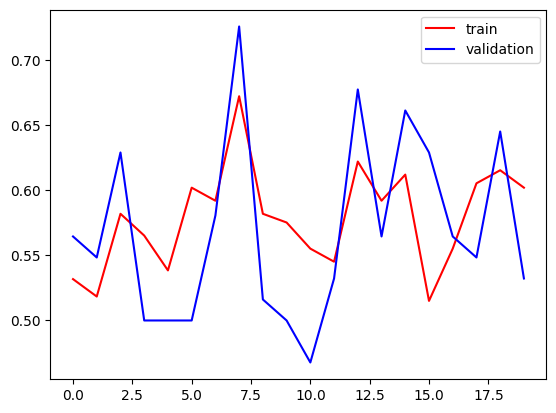

In [60]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color="red", label="train")
plt.plot(history.history["val_accuracy"], color="blue", label="validation")
plt.legend()
plt.show()

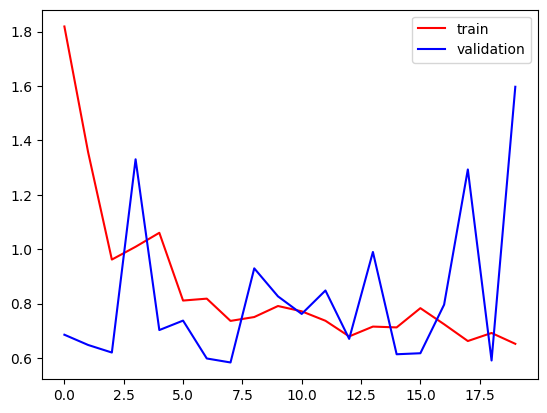

In [61]:
plt.plot(history.history["loss"], color="red", label="train")
plt.plot(history.history["val_loss"], color="blue", label="validation")
plt.legend()
plt.show()